# Download do Dataset "The Movies Dataset" do Kaggle
[Link para o Dataset no Kaggle](https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset)

Para baixar e utilizar o dataset diretamente no seu notebook, siga os passos abaixo:

## 1. Instalar a Biblioteca Kaggle

Primeiro, certifique-se de que a biblioteca `kaggle` está instalada. Se não estiver, você pode instalá-la com o seguinte comando:

```bash
!pip install kaggle

In [249]:
# !pip install kaggle
# !pip install mlxtend

## 2. Download do Dataset

Nesta seção, estamos realizando o download do "The Movies Dataset" do Kaggle diretamente para o nosso ambiente de desenvolvimento.

### Baixando o Dataset

O comando a seguir utiliza a biblioteca `kaggle` para fazer o download do dataset diretamente do site do Kaggle:

```bash
!kaggle datasets download -d rounakbanik/the-movies-dataset
```

Após o download, o dataset está compactado em um arquivo ZIP. Para utilizá-lo, precisamos extrair os arquivos contidos nele. O código abaixo realiza essa extração:

```bash
import zipfile
import os

with zipfile.ZipFile("the-movies-dataset.zip", "r") as zip_ref:
    zip_ref.extractall("the-movies-dataset")
```

In [250]:
# !kaggle datasets download -d rounakbanik/the-movies-dataset
# import zipfile
# import os

# # Extraindo o arquivo ZIP
# with zipfile.ZipFile("the-movies-dataset.zip", "r") as zip_ref:
#     zip_ref.extractall("the-movies-dataset")

# Análise Exploratória dos Dados do Conjunto "The Movies Dataset"

Neste notebook, realizaremos uma análise exploratória completa do conjunto de dados "The Movies Dataset" disponível no Kaggle. Esta análise incluirá o carregamento dos dados, compreensão da sua estrutura, limpeza dos dados e realização de várias análises para obter insights sobre a indústria cinematográfica.

In [251]:
# !pip install wordcloud

In [252]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Configurando o estilo dos gráficos
sns.set(style="whitegrid")

## Carregando os Dados

Vamos começar carregando os arquivos CSV disponíveis no conjunto de dados. Esses arquivos contêm diversas informações relacionadas a filmes, como créditos, links, metadados dos filmes, avaliações, entre outros.

In [253]:
# Carregando os diferentes arquivos CSV
links_small = pd.read_csv('the-movies-dataset/links_small.csv')
movies_metadata = pd.read_csv('the-movies-dataset/movies_metadata.csv')

print("\nMovies Metadata:")
print(movies_metadata.head())

C:\Users\Eric\AppData\Local\Temp\ipykernel_24548\3262467926.py:3: DtypeWarning:

Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.




Movies Metadata:
   adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                                NaN  65000000   
2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3  False                                                NaN  16000000   
4  False  {'id': 96871, 'name': 'Father of the Bride Col...         0   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   

                               homepage     id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story    862  tt0114709                en   
1                                   NaN   8844  

## Explorando a Estrutura dos Dados

Nesta seção, vamos explorar a estrutura de cada um dos arquivos carregados, analisando o número de linhas e colunas, o tipo de dados presente em cada coluna, e identificando valores nulos ou ausentes.

In [254]:
# Exibindo a estrutura dos dados
print("\nEstrutura de Links Small:")
print(links_small.info())

print("\nEstrutura de Movies Metadata:")
print(movies_metadata.info())



Estrutura de Links Small:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9125 non-null   int64  
 1   imdbId   9125 non-null   int64  
 2   tmdbId   9112 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 214.0 KB
None

Estrutura de Movies Metadata:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   origina

## Limpeza e Preparação dos Dados

Antes de realizar qualquer análise, é importante garantir que os dados estejam limpos e bem preparados. Nesta seção, vamos tratar valores nulos, corrigir tipos de dados, e remover quaisquer inconsistências.


In [255]:
# Tratando valores nulos
movies_metadata = movies_metadata.dropna(subset=['title'])  # Exemplo de remoção de filmes sem título
movies_metadata['year'] = pd.to_datetime(movies_metadata['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)
# Removendo valores duplicados, se houver
movies_metadata = movies_metadata.drop_duplicates(subset='id', keep='first')

# Convertendo colunas para o tipo correto
movies_metadata['budget'] = pd.to_numeric(movies_metadata['budget'], errors='coerce')
movies_metadata['revenue'] = pd.to_numeric(movies_metadata['revenue'], errors='coerce')

links_small = links_small[links_small['tmdbId'].notnull()]['tmdbId'].astype('int')

# Exibindo a estrutura dos dados após a limpeza
print("\nEstrutura de Movies Metadata após a limpeza:")
print(movies_metadata.info())

print("\nEstrutura de Links Small após a limpeza:")
print(links_small.info())


Estrutura de Movies Metadata após a limpeza:
<class 'pandas.core.frame.DataFrame'>
Index: 45430 entries, 0 to 45465
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45430 non-null  object 
 1   belongs_to_collection  4487 non-null   object 
 2   budget                 45430 non-null  int64  
 3   genres                 45430 non-null  object 
 4   homepage               7773 non-null   object 
 5   id                     45430 non-null  object 
 6   imdb_id                45413 non-null  object 
 7   original_language      45419 non-null  object 
 8   original_title         45430 non-null  object 
 9   overview               44476 non-null  object 
 10  popularity             45430 non-null  object 
 11  poster_path            45047 non-null  object 
 12  production_companies   45430 non-null  object 
 13  production_countries   45430 non-null  object 
 14  release_date 

In [256]:
movies_metadata.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'year'],
      dtype='object')

In [257]:
movies_metadata.shape

(45430, 25)

In [258]:
movies_metadata = movies_metadata.drop(['imdb_id','original_title', 'adult'], axis=1)

In [259]:
movies_metadata['revenue'] = movies_metadata['revenue'].replace(0, np.nan)
movies_metadata['budget'] = movies_metadata['budget'].replace(0, np.nan)
movies_metadata['return'] = movies_metadata['revenue'] / movies_metadata['budget']

In [260]:
# Estatísticas descritivas para o conjunto de dados de metadados de filmes
movies_metadata.describe()

,budget,revenue,runtime,vote_average,vote_count,return
count,8.880000e+03,7.398000e+03,45173.00000,45430.000000,45430.000000,5.375000e+03
mean,2.161418e+07,6.885663e+07,94.12430,5.618329,109.935989,5.572109e+03
std,3.432554e+07,1.465048e+08,38.41554,1.924139,491.466335,2.169776e+05
min,1.000000e+00,1.000000e+00,0.00000,0.000000,0.000000,5.217391e-07
25%,2.000000e+06,2.400378e+06,85.00000,5.000000,3.000000,7.871823e-01
50%,8.000000e+06,1.683423e+07,95.00000,6.000000,10.000000,2.057193e+00
75%,2.500000e+07,6.731169e+07,107.00000,6.800000,34.000000,4.242222e+00
max,3.800000e+08,2.787965e+09,1256.00000,10.000000,14075.000000,1.239638e+07


In [261]:
base_poster_url = 'http://image.tmdb.org/t/p/w185/'
movies_metadata['poster_path'] = "<img src='" + base_poster_url + movies_metadata['poster_path'] + "' style='height:100px;'>"

## Convertendo Strings para Categóricos e Salvando em Parquet

Nesta etapa, vamos converter todas as colunas de texto (strings) em valores categóricos para otimizar o espaço e desempenho. Em seguida, salvaremos o DataFrame limpo em um arquivo no formato Parquet.

In [262]:
movies_metadata

,belongs_to_collection,budget,genres,homepage,id,original_language,overview,popularity,poster_path,production_companies,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,year,return
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,<img src='http://image.tmdb.org/t/p/w185//rhIR...,"[{'name': 'Pixar Animation Studios', 'id': 3}]",...,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,1995,12.451801
1,NaN,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,en,When siblings Judy and Peter discover an encha...,17.015539,<img src='http://image.tmdb.org/t/p/w185//vzmL...,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",...,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,1995,4.043035
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,en,A family wedding reignites the ancient feud be...,11.7129,<img src='http://image.tmdb.org/t/p/w185//6ksm...,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",...,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,1995,NaN
3,NaN,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,<img src='http://image.tmdb.org/t/p/w185//16XO...,[{'name': 'Twentieth Century Fox Film Corporat...,...,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,1995,5.090760
4,"{'id': 96871, 'name': 'Father of the Bride Col...",NaN,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,en,Just when George Banks has recovered from his ...,8.387519,<img src='http://image.tmdb.org/t/p/w185//e64s...,"[{'name': 'Sandollar Productions', 'id': 5842}...",...,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,1995,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,NaN,NaN,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,fa,Rising and falling between a man and woman.,0.072051,<img src='http://image.tmdb.org/t/p/w185//jlds...,[],...,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0,NaT,NaN
45462,NaN,NaN,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tl,An artist struggles to finish his work while a...,0.178241,<img src='http://image.tmdb.org/t/p/w185//xZkm...,"[{'name': 'Sine Olivia', 'id': 19653}]",...,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0,2011,NaN
45463,NaN,NaN,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,en,"When one of her hits goes wrong, a professiona...",0.903007,<img src='http://image.tmdb.org/t/p/w185//d5bX...,"[{'name': 'American World Pictures', 'id': 6165}]",...,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0,2003,NaN
45464,NaN,NaN,[],NaN,227506,en,"In a small town live two brothers, one a minis...",0.003503,<img src='http://image.tmdb.org/t/p/w185//aorB...,"[{'name': 'Yermoliev', 'id': 88753}]",...,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0,1917,NaN


## Análise Exploratória

Agora que os dados estão preparados, vamos explorar as informações presentes no conjunto de dados. Nesta seção, faremos análises estatísticas descritivas, visualizações gráficas e identificaremos tendências e padrões interessantes.

In [263]:
# Convertendo a coluna 'year' para o tipo numérico, ignorando erros
movies_metadata['year'] = pd.to_numeric(movies_metadata['year'], errors='coerce')

# Removendo valores nulos após a conversão
movies_metadata = movies_metadata.dropna(subset=['year'])

# Criando uma nova coluna para armazenar a década
movies_metadata['decade'] = (movies_metadata['year'] // 10) * 10

# Agrupando o número de filmes por década
decade_count = movies_metadata['decade'].value_counts().sort_index()

# Criando o gráfico interativo
fig = px.bar(decade_count, x=decade_count.index, y=decade_count.values,
             labels={'x': 'Década', 'y': 'Número de Filmes'},
             title='Distribuição de Filmes por Década')

# Ajustando o layout do gráfico
fig.update_layout(title_font_size=16, xaxis_title_font_size=14, yaxis_title_font_size=14)

# Exibindo o gráfico interativo
fig.show()

In [264]:
import plotly.express as px

# Criando o boxplot interativo das notas por ano
fig = px.box(movies_metadata, x='decade', y='vote_average',
             labels={'year': 'Ano', 'vote_average': 'Nota Média'},
             title='Distribuição das Notas dos Filmes por Ano')

# Ajustando o layout do gráfico
fig.update_layout(title_font_size=16, xaxis_title_font_size=14, yaxis_title_font_size=14)

# Exibindo o gráfico interativo
fig.show()


In [265]:
# Explodindo os gêneros em múltiplas linhas para cada filme
movies_metadata['genres'] = movies_metadata['genres'].apply(
    lambda x: [d['name'] for d in eval(x)] if pd.notnull(x) else []
)
genres_df = movies_metadata.explode('genres')

# Contando o número de filmes por gênero por década
genre_decade_count = genres_df.groupby(['decade', 'genres']).size().reset_index(name='film_count')

# Criando o gráfico interativo
fig = px.bar(genre_decade_count, x='decade', y='film_count', color='genres',
             labels={'decade': 'Década', 'film_count': 'Número de Filmes', 'genres': 'Gênero'},
             title='Popularidade dos Gêneros de Filmes por Década')

# Ajustando o layout do gráfico
fig.update_layout(title_font_size=16, xaxis_title_font_size=14, yaxis_title_font_size=14)

# Exibindo o gráfico interativo
fig.show()

In [266]:
# Contando o número de filmes por gênero
genre_count = genres_df['genres'].value_counts().reset_index()
genre_count.columns = ['genre', 'film_count']

# Criando o gráfico interativo
fig = px.bar(genre_count, x='genre', y='film_count',
             labels={'genre': 'Gênero', 'film_count': 'Número de Filmes'},
             title='Número de Filmes por Gênero')

# Ajustando o layout do gráfico
fig.update_layout(title_font_size=16, xaxis_title_font_size=14, yaxis_title_font_size=14)

# Exibindo o gráfico interativo
fig.show()

In [267]:
# Convertendo a coluna 'budget' para numérico
movies_metadata['budget'] = pd.to_numeric(movies_metadata['budget'], errors='coerce')

# Calculando o orçamento médio por ano
average_budget_per_year = movies_metadata.groupby('year')['budget'].mean().reset_index()

# Criando o gráfico interativo
fig = px.line(average_budget_per_year, x='year', y='budget',
              labels={'year': 'Ano', 'budget': 'Orçamento Médio (USD)'},
              title='Evolução dos Orçamentos Médios dos Filmes por Ano')

# Ajustando o layout do gráfico
fig.update_layout(title_font_size=16, xaxis_title_font_size=14, yaxis_title_font_size=14)

# Exibindo o gráfico interativo
fig.show()


In [268]:
# Criando o gráfico de dispersão interativo
fig = px.scatter(movies_metadata, x='budget', y='vote_average',
                 labels={'budget': 'Orçamento (USD)', 'vote_average': 'Nota Média'},
                 title='Relação entre Orçamento e Nota Média dos Filmes')

# Ajustando o layout do gráfico
fig.update_layout(title_font_size=16, xaxis_title_font_size=14, yaxis_title_font_size=14)

# Exibindo o gráfico interativo
fig.show()

In [269]:
import plotly.express as px
import pandas as pd

# Extraindo os países da coluna 'production_countries'
movies_metadata['countries'] = movies_metadata['production_countries'].apply(
    lambda x: [d['name'] for d in eval(x)] if pd.notnull(x) else []
)

# Criando um DataFrame com uma linha por país e contando os filmes por país
countries_df = movies_metadata.explode('countries')
country_counts = countries_df['countries'].value_counts().reset_index()
country_counts.columns = ['country', 'film_count']

# Criando o mapa interativo com cores do branco para o vermelho
fig = px.choropleth(country_counts,
                    locations="country",
                    locationmode='country names',
                    color="film_count",
                    hover_name="country",
                    color_continuous_scale=px.colors.sequential.Reds,
                    labels={'film_count': 'Número de Filmes'},
                    title="Número de Filmes por País")

# Ajustando o layout do mapa
fig.update_layout(
    title_font_size=20,
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='natural earth',  # Tipo de projeção mais natural
        showland=True,
        landcolor='white',
        showlakes=True,
        lakecolor='lightblue',
        subunitwidth=0.5,
        countrywidth=0.5
    ),
    margin={"r":0,"t":50,"l":0,"b":0},  # Removendo margens desnecessárias
)

# Exibindo o mapa interativo
fig.show()

In [270]:
import plotly.express as px

# Filtrando valores para evitar problemas com escalas logarítmicas (opcional)
movies_metadata_filtered = movies_metadata[(movies_metadata['budget'] > 0) & (movies_metadata['revenue'] > 0)]

# Criando o gráfico de dispersão interativo
fig = px.scatter(movies_metadata_filtered, x='budget', y='revenue', 
                 labels={'budget': 'Orçamento (USD)', 'revenue': 'Receita (USD)'},
                 title='Orçamento vs Receita')

# Definindo a mesma escala para os eixos X e Y
fig.update_xaxes(type="log", matches='y')
fig.update_yaxes(type="log", matches='x')

# Adicionando a linha onde receita = orçamento
fig.add_shape(
    type="line",
    x0=min(movies_metadata_filtered['budget']),
    y0=min(movies_metadata_filtered['budget']),
    x1=max(movies_metadata_filtered['budget']),
    y1=max(movies_metadata_filtered['budget']),
    line=dict(color="red", width=2, dash="dash"),
)

# Ajustando o layout
fig.update_layout(
    title_font_size=16,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    width=800,
    height=600,
    showlegend=False
)

# Exibindo o gráfico interativo
fig.show()


In [271]:
print(movies_metadata['genres'].head())

0     [Animation, Comedy, Family]
1    [Adventure, Fantasy, Family]
2               [Romance, Comedy]
3        [Comedy, Drama, Romance]
4                        [Comedy]
Name: genres, dtype: object


In [272]:
import pandas as pd
import plotly.express as px
from itertools import combinations

# Filtrando filmes que têm mais de um gênero
movies_metadata = movies_metadata[movies_metadata['genres'].apply(len) > 0]

# Gerando todas as combinações possíveis de gêneros por filme
genre_combinations = movies_metadata['genres'].apply(lambda x: list(combinations(x, 2)))

# Flattening the list of lists
flat_combinations = [item for sublist in genre_combinations for item in sublist]

# Criando uma matriz de coocorrência
cooccurrence_matrix = pd.DataFrame(flat_combinations, columns=['Genre1', 'Genre2'])
cooccurrence_matrix['Cooccurrence'] = 1

# Criando uma tabela de contingência (matriz de coocorrência)
cooccurrence_pivot = cooccurrence_matrix.pivot_table(index='Genre1', columns='Genre2', values='Cooccurrence', aggfunc='sum', fill_value=0)

# Calculando o número de filmes por gênero para preencher a diagonal
genre_counts = movies_metadata['genres'].explode().value_counts()

# Preenchendo a diagonal com o número de filmes em que cada gênero aparece
for genre in genre_counts.index:
    cooccurrence_pivot.loc[genre, genre] = genre_counts[genre]

# Normalizando a matriz dividindo cada célula pelo número de aparições do gênero na linha
for genre in cooccurrence_pivot.index:
    cooccurrence_pivot.loc[genre] = cooccurrence_pivot.loc[genre] / genre_counts[genre]

# Adicionando os gêneros que podem estar ausentes na diagonal
for genre in cooccurrence_pivot.index:
    if genre not in cooccurrence_pivot.columns:
        cooccurrence_pivot[genre] = 0

for genre in cooccurrence_pivot.columns:
    if genre not in cooccurrence_pivot.index:
        cooccurrence_pivot.loc[genre] = 0

# Ordenando a matriz
cooccurrence_pivot = cooccurrence_pivot.sort_index(axis=0).sort_index(axis=1)

# Criando o heatmap interativo com quadrados maiores e paleta de cores "Blues"
fig = px.imshow(cooccurrence_pivot,
                labels=dict(x="Gênero", y="Gênero", color="Proporção de Coocorrência"),
                x=cooccurrence_pivot.columns,
                y=cooccurrence_pivot.index,
                color_continuous_scale="Blues",  # Usando a paleta de cores "Blues"
                title="Matriz de Coocorrência Normalizada de Gêneros de Filmes")

# Ajustando o layout do gráfico para aumentar o tamanho dos quadrados
fig.update_layout(
    title_font_size=20,
    xaxis_title_font_size=16,
    yaxis_title_font_size=16,
    width=1000,  # Largura maior
    height=1000,  # Altura maior
    xaxis=dict(tickangle=-45),  # Rotacionando os nomes dos gêneros para melhor legibilidade
)

# Exibindo o gráfico interativo
fig.show()


C:\Users\Eric\AppData\Local\Temp\ipykernel_24548\857919911.py:30: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.19823922282938677' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

C:\Users\Eric\AppData\Local\Temp\ipykernel_24548\857919911.py:30: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.030206435944140863' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

C:\Users\Eric\AppData\Local\Temp\ipykernel_24548\857919911.py:30: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.17972070431086826' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

C:\Users\Eric\AppData\Local\Temp\ipykernel_24548\857919911.py:30: FutureWarning:

Se

In [273]:
import plotly.express as px
import pandas as pd

# Assuming you have the `movies_metadata` DataFrame already loaded
correlation_matrix = movies_metadata[['budget', 'revenue', 'runtime', 'vote_average', 'popularity']].corr(method='pearson')

# Round the correlation values to two decimal places
correlation_matrix = correlation_matrix.round(2)

# Create the heatmap
fig = px.imshow(correlation_matrix,
                text_auto=True,
                color_continuous_scale='RdBu_r',
                labels=dict(x="Attributes", y="Attributes", color="Correlation"),
                title="Matriz de Correlação entre Atributos")

# Update layout for better visuals
fig.update_layout(
    width=800,
    height=600,
    xaxis_title="Atributos",
    yaxis_title="Atributos"
)

# Show the interactive plot
fig.show()


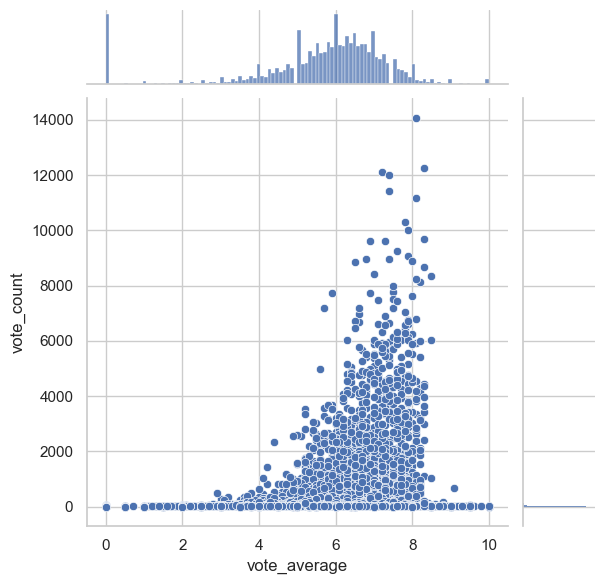

In [274]:
sns.jointplot(x='vote_average', y='vote_count', data=movies_metadata)

In [275]:
# from wordcloud import WordCloud, STOPWORDS
# import matplotlib.pyplot as plt

# # Supondo que 'df' já tenha as colunas 'title' e 'overview' convertidas para string
# title_corpus = ' '.join(movies_metadata['title'])
# overview_corpus = ' '.join(movies_metadata['overview'].astype('str'))

# # Gerando a nuvem de palavras para os títulos
# title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)

# overview_corpus_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(overview_corpus)


# # Exibindo a nuvem de palavras
# plt.figure(figsize=(16, 8))
# plt.imshow(title_wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.title('Nuvem de Palavras - Títulos de Filmes', fontsize=20)
# plt.show()


# # Exibindo a nuvem de palavras
# plt.figure(figsize=(16, 8))
# plt.imshow(overview_corpus_wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.title('Nuvem de Palavras - Sinopse de Filmes', fontsize=20)
# plt.show()

In [276]:
movies_metadata['id'] = movies_metadata['id'].astype('int')
s_movies_metadata = movies_metadata[movies_metadata['id'].isin(links_small)]
s_movies_metadata

,belongs_to_collection,budget,genres,homepage,id,original_language,overview,popularity,poster_path,production_companies,...,status,tagline,title,video,vote_average,vote_count,year,return,decade,countries
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,<img src='http://image.tmdb.org/t/p/w185//rhIR...,"[{'name': 'Pixar Animation Studios', 'id': 3}]",...,Released,NaN,Toy Story,False,7.7,5415.0,1995.0,12.451801,1990.0,[United States of America]
1,NaN,65000000.0,"[Adventure, Fantasy, Family]",NaN,8844,en,When siblings Judy and Peter discover an encha...,17.015539,<img src='http://image.tmdb.org/t/p/w185//vzmL...,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",...,Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,1995.0,4.043035,1990.0,[United States of America]
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,"[Romance, Comedy]",NaN,15602,en,A family wedding reignites the ancient feud be...,11.7129,<img src='http://image.tmdb.org/t/p/w185//6ksm...,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",...,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,1995.0,NaN,1990.0,[United States of America]
3,NaN,16000000.0,"[Comedy, Drama, Romance]",NaN,31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,<img src='http://image.tmdb.org/t/p/w185//16XO...,[{'name': 'Twentieth Century Fox Film Corporat...,...,Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,1995.0,5.090760,1990.0,[United States of America]
4,"{'id': 96871, 'name': 'Father of the Bride Col...",NaN,[Comedy],NaN,11862,en,Just when George Banks has recovered from his ...,8.387519,<img src='http://image.tmdb.org/t/p/w185//e64s...,"[{'name': 'Sandollar Productions', 'id': 5842}...",...,Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,1995.0,NaN,1990.0,[United States of America]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39784,NaN,8000000.0,[Drama],NaN,159550,en,A man must cope with the loss of his wife and ...,0.038998,<img src='http://image.tmdb.org/t/p/w185//yWp7...,"[{'name': 'Nasser Entertainment', 'id': 35802}]",...,Released,NaN,The Last Brickmaker in America,False,7.0,1.0,2001.0,NaN,2000.0,[United States of America]
40004,NaN,1000000.0,"[Thriller, Romance]",NaN,392572,hi,"Rustom Pavri, an honourable officer of the Ind...",7.333139,<img src='http://image.tmdb.org/t/p/w185//q1lr...,"[{'name': 'KriArj Entertainment', 'id': 91689}]",...,Released,Decorated Officer. Devoted Family Man. Defendi...,Rustom,False,7.3,25.0,2016.0,NaN,2010.0,[India]
40058,NaN,15050000.0,"[Adventure, Drama, History, Romance]",NaN,402672,hi,"Village lad Sarman is drawn to big, bad Mohenj...",1.423358,<img src='http://image.tmdb.org/t/p/w185//q2XV...,"[{'name': 'UTV Motion Pictures', 'id': 2320}, ...",...,Released,NaN,Mohenjo Daro,False,6.7,26.0,2016.0,1.075083,2010.0,[India]
40224,NaN,15000000.0,"[Action, Adventure, Drama, Horror, Science Fic...",NaN,315011,ja,From the mind behind Evangelion comes a hit la...,9.285519,<img src='http://image.tmdb.org/t/p/w185//8YWi...,"[{'name': 'Cine Bazar', 'id': 5896}, {'name': ...",...,Released,A god incarnate. A city doomed.,Shin Godzilla,False,6.6,152.0,2016.0,5.133333,2010.0,[Japan]


In [296]:
ratings = pd.read_csv('./the-movies-dataset/ratings_small.csv')

In [285]:
ratings

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


In [300]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Filtrar ratings para considerar apenas aqueles com nota 3 ou mais
filtered_ratings = ratings[ratings['rating'] >= 3]

# Criar uma tabela de transações (one-hot encoded)
transactions = (filtered_ratings.groupby(['userId', 'movieId'])['rating']
                .max().unstack().reset_index().fillna(0)
                .set_index('userId'))

# Converter valores para 1 ou 0 (1 se o filme foi avaliado, 0 caso contrário)
transactions = transactions.applymap(lambda x: 1 if x >= 3 else 0)

# Verificar a quantidade de dados após a filtragem
print(f"Total de transações: {len(transactions)}")
print(f"Total de itens (filmes): {transactions.shape[1]}")
print(f"Quantidade de 1s na matriz de transações: {transactions.sum().sum()}")

# Aplicar o algoritmo Apriori com um suporte mínimo muito baixo
frequent_itemsets = apriori(transactions, min_support=0.0001, use_colnames=True, low_memory=True)

# Verifique se frequent_itemsets não está vazio
if not frequent_itemsets.empty:
    # Gerar as regras de associação
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

    # Exibir as regras de associação
    rules = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
    print(rules)
else:
    print("Nenhum conjunto frequente encontrado. Considere diminuir o min_support ou ajustar os dados.")


C:\Users\Eric\AppData\Local\Temp\ipykernel_24548\3574067773.py:13: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



Total de transações: 671
Total de itens (filmes): 7939
Quantidade de 1s na matriz de transações: 82170


c:\Users\Eric\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type

